In [1]:
from datetime import datetime
from lassort import load, localAssortF
import networkx as nx
import numpy as np
import pandas as pd

from networkx.generators.community import stochastic_block_model as sbm
from networkx.algorithms.community import modularity
from matplotlib import pyplot as plt

How does modularity vary as a function of community size in a planted partition model with variable group sizes and fixed probabilities?

In [4]:
N = 800
p = [[.1,.05], [.05, .1]]
pnp = np.array(p)

def run_analysis(
    s0,
    N=N,
    p=p):
    sizes = [s0, N - s0]
    G = sbm(sizes, p)
    E = nx.convert_matrix.to_pandas_edgelist(G).values
    M = np.hstack([np.zeros(sizes[0]), np.ones(sizes[1])])

    # modularity of partition
    A = nx.convert_matrix.to_scipy_sparse_matrix(G)

    # this is the stub count, or the edge count times 2
    m2 = A.sum()

    # intra-community edge density for each group
    e0 = A[:sizes[0], :sizes[0]].sum() / m2
    e1 = A[sizes[0]:, sizes[0]:].sum() / m2

    # degree proportion for each group
    a0 = A[:sizes[0],:].sum() / m2
    a1 = A[sizes[0]:,:].sum() / m2

    # modularity score
    Q = e0 -a0**2 + e1 - a1**2
    
    return (m2/2, e0, e1, a0, a1, Q)

In [8]:
# s0s = pd.Series(np.arange(10, 401, 10))
# results = s0s.apply(run_analysis)

columns = ["m", "e0", "e1", "a0", "a1", "Q"]
df = pd.DataFrame(
    results.to_list(),
    columns=columns
)
df["s0"] = s0s

df_rev = df.copy()
df_rev["s0"] = N - df_rev.s0

# switch T0, T1
# swiith a0, a1
# switch e0, e1
df_rev.columns = ['m', 'e1', 'e0', 'a1', 'a0', 'Q', 's0']
df = pd.concat([df,df_rev], axis=0).sort_values("s0").reset_index(drop=True)

df

,m,e0,e1,a0,a1,Q,s0
0,31637.0,0.000032,0.987799,0.006116,0.993884,-0.000012,10
1,31079.0,0.000483,0.974259,0.013112,0.986888,0.000621,20
2,31141.0,0.001413,0.959956,0.020728,0.979272,0.001967,30
3,30238.0,0.002910,0.945896,0.028507,0.971493,0.004195,40
4,29836.0,0.004257,0.934643,0.034807,0.965193,0.006090,50
...,...,...,...,...,...,...,...
75,29836.0,0.934643,0.004257,0.965193,0.034807,0.006090,750
76,30238.0,0.945896,0.002910,0.971493,0.028507,0.004195,760
77,31141.0,0.959956,0.001413,0.979272,0.020728,0.001967,770
78,31079.0,0.974259,0.000483,0.986888,0.013112,0.000621,780


<AxesSubplot:>

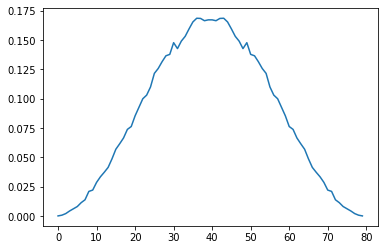

In [9]:
df.Q.plot()

In [91]:
omega = np.array(p)
s0 = 10

omega[0,0] = omega[0,0] * s0 * (s0 - 1) / 2
omega[0,1] = omega[0,1] * s0 * (N-1)
omega[1,0] = omega[0,1]
omega[1,1] = omega[1,1] * (N-s0) * (N - s0 -1) / 2 

omega

array([[4.50000e+00, 3.99500e+02],
       [3.99500e+02, 3.11655e+04]])

In [97]:
er = (np.diag(omega) ** 2).sum()
er

971288410.5

In [95]:
4.5 ** 2

20.25

In [90]:
sizes = [s0, N - s0]
G = sbm(sizes, p)
len(G.edges)

31729